In [169]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [170]:
df= pd.read_csv('laptop_price.csv',encoding='latin-1')
df_1=df
df.head()

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69
1,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94
2,3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00
3,4,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45
4,5,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60


In [171]:
df.describe()

,laptop_ID,Inches,Price_euros
count,1303.000000,1303.000000,1303.000000
mean,660.155794,15.017191,1123.686992
std,381.172104,1.426304,699.009043
min,1.000000,10.100000,174.000000
25%,331.500000,14.000000,599.000000
50%,659.000000,15.600000,977.000000
75%,990.500000,15.600000,1487.880000
max,1320.000000,18.400000,6099.000000


In [172]:
df.skew(numeric_only=True)

laptop_ID      0.004766
Inches        -0.446913
Price_euros    1.520866
dtype: float64

In [173]:
df.duplicated().sum()

0

In [174]:
df.isna().sum()

laptop_ID           0
Company             0
Product             0
TypeName            0
Inches              0
ScreenResolution    0
Cpu                 0
Ram                 0
Memory              0
Gpu                 0
OpSys               0
Weight              0
Price_euros         0
dtype: int64

In [175]:
import data_cleaning_visualization as dcv
cleaner=dcv.DataCleaningAndVisualization()

In [176]:
cleaner.data_info(df)

,Col,dtype,n_uniques,n_nan,unique_val,duplicated
0,laptop_ID,int64,1303,0,"[1, 867, 885, 884, 883, 882, 881, 880, 879, 878]",0
1,Company,object,19,0,"[Dell, Lenovo, HP, Asus, Acer, MSI, Toshiba, A...",0
2,Product,object,618,0,"[XPS 13, Inspiron 3567, 250 G6, Legion Y520-15...",0
3,TypeName,object,6,0,"[Notebook, Gaming, Ultrabook, 2 in 1 Convertib...",0
4,Inches,float64,18,0,"[15.6, 14.0, 13.3, 17.3, 12.5, 11.6, 12.0, 13....",0
5,ScreenResolution,object,40,0,"[Full HD 1920x1080, 1366x768, IPS Panel Full H...",0
6,Cpu,object,118,0,"[Intel Core i5 7200U 2.5GHz, Intel Core i7 770...",0
7,Ram,object,9,0,"[8GB, 4GB, 16GB, 6GB, 12GB, 2GB, 32GB, 24GB, 6...",0
8,Memory,object,39,0,"[256GB SSD, 1TB HDD, 500GB HDD, 512GB SSD, 128...",0
9,Gpu,object,110,0,"[Intel HD Graphics 620, Intel HD Graphics 520,...",0


In [177]:
df["Ram"]=df["Ram"].str.replace("GB","")
df.Ram=  pd.to_numeric(df['Ram'], errors='coerce')
df = df.drop(columns=["laptop_ID"])


In [178]:
df.Weight = df.Weight.str.replace("kg","")

In [179]:
df.Weight = pd.to_numeric(df['Weight'], errors='coerce')

In [180]:
df.head()

,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,1339.69
1,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,898.94
2,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,575.00
3,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,2537.45
4,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,1803.60


In [181]:
df.dtypes

Company              object
Product              object
TypeName             object
Inches              float64
ScreenResolution     object
Cpu                  object
Ram                   int64
Memory               object
Gpu                  object
OpSys                object
Weight              float64
Price_euros         float64
dtype: object

In [182]:
cleaner.data_info(df)

,Col,dtype,n_uniques,n_nan,unique_val,duplicated
0,Company,object,19,0,"[Dell, Lenovo, HP, Asus, Acer, MSI, Toshiba, A...",28
1,Product,object,618,0,"[XPS 13, Inspiron 3567, 250 G6, Legion Y520-15...",28
2,TypeName,object,6,0,"[Notebook, Gaming, Ultrabook, 2 in 1 Convertib...",28
3,Inches,float64,18,0,"[15.6, 14.0, 13.3, 17.3, 12.5, 11.6, 12.0, 13....",28
4,ScreenResolution,object,40,0,"[Full HD 1920x1080, 1366x768, IPS Panel Full H...",28
5,Cpu,object,118,0,"[Intel Core i5 7200U 2.5GHz, Intel Core i7 770...",28
6,Ram,int64,9,0,"[8, 4, 16, 6, 12, 2, 32, 24, 64]",28
7,Memory,object,39,0,"[256GB SSD, 1TB HDD, 500GB HDD, 512GB SSD, 128...",28
8,Gpu,object,110,0,"[Intel HD Graphics 620, Intel HD Graphics 520,...",28
9,OpSys,object,9,0,"[Windows 10, No OS, Linux, Windows 7, Chrome O...",28


In [183]:
df = df.rename(columns={"Price_euros":"Price"})

In [184]:
df.head()

,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,1339.69
1,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,898.94
2,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,575.00
3,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,2537.45
4,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,1803.60


<Axes: xlabel='Price', ylabel='Density'>

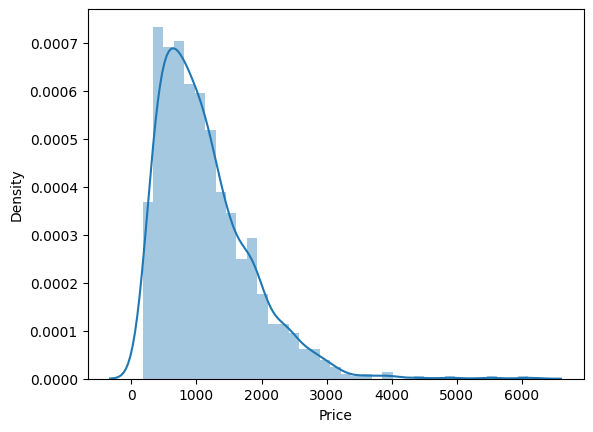

In [185]:
sns.distplot(df.Price)

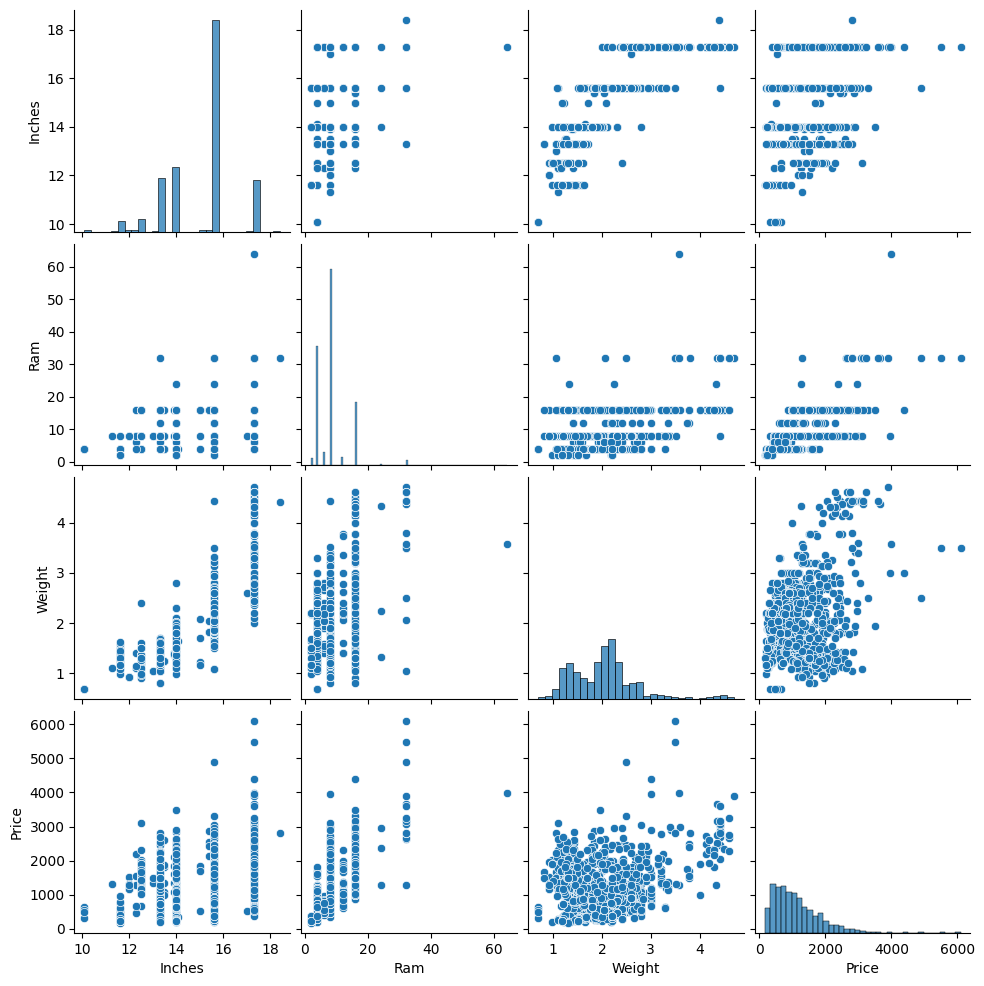

In [186]:
sns.pairplot(df)

<Axes: xlabel='Company'>

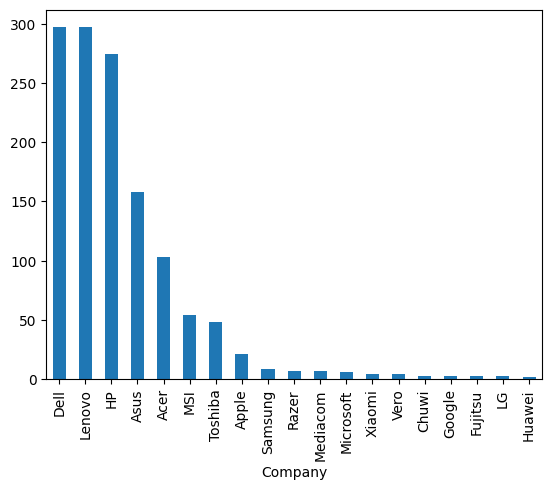

In [187]:
df['Company'].value_counts().plot(kind='bar')

In [188]:
df.ScreenResolution.value_counts()

ScreenResolution
Full HD 1920x1080                                507
1366x768                                         281
IPS Panel Full HD 1920x1080                      230
IPS Panel Full HD / Touchscreen 1920x1080         53
Full HD / Touchscreen 1920x1080                   47
1600x900                                          23
Touchscreen 1366x768                              16
Quad HD+ / Touchscreen 3200x1800                  15
IPS Panel 4K Ultra HD 3840x2160                   12
IPS Panel 4K Ultra HD / Touchscreen 3840x2160     11
4K Ultra HD / Touchscreen 3840x2160               10
4K Ultra HD 3840x2160                              7
Touchscreen 2560x1440                              7
IPS Panel 1366x768                                 7
IPS Panel Quad HD+ / Touchscreen 3200x1800         6
IPS Panel Retina Display 2560x1600                 6
IPS Panel Retina Display 2304x1440                 6
Touchscreen 2256x1504                              6
IPS Panel Touchscreen 2560x14

In [189]:
df['touch_screen']= df['ScreenResolution'].apply(lambda x:1 if 'Touchscreen' in x else 0)
df['IPS_display']= df['ScreenResolution'].apply(lambda x:1 if 'IPS' in x else 0)
df.sample(5)

,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,touch_screen,IPS_display
507,Acer,Aspire A515-51G-59QF,Notebook,15.6,IPS Panel Full HD 1920x1080,Intel Core i5 8250U 1.6GHz,4,1TB HDD,Nvidia GeForce MX150,Windows 10,2.20,613.0,0,1
55,Dell,Inspiron 3576,Notebook,15.6,Full HD 1920x1080,Intel Core i7 8550U 1.8GHz,8,256GB SSD,AMD Radeon 520,Windows 10,2.13,767.8,0,0
354,Toshiba,Tecra A50-C-21G,Notebook,15.6,IPS Panel Full HD 1920x1080,Intel Core i7 6500U 2.5GHz,16,512GB SSD,Nvidia GeForce 930M,Windows 10,2.40,1403.0,0,1
332,Asus,UX510UX-CN269T (i7-7500U/8GB/256GB,Notebook,14.0,Full HD 1920x1080,Intel Core i7 7500U 2.7GHz,8,256GB SSD + 1TB HDD,Intel HD Graphics 620,Windows 10,2.00,1334.0,0,0
497,HP,EliteBook 840,Notebook,14.0,Full HD 1920x1080,Intel Core i7 7600U 2.8GHz,8,1TB SSD,Intel HD Graphics 620,Windows 10,1.48,1749.0,0,0


In [190]:
new=df['ScreenResolution'].str.split('x',n=1,expand=True)
new.head()

,0,1
0,IPS Panel Retina Display 2560,1600
1,1440,900
2,Full HD 1920,1080
3,IPS Panel Retina Display 2880,1800
4,IPS Panel Retina Display 2560,1600


In [191]:
new.value_counts()

0                                         1   
Full HD 1920                              1080    507
1366                                      768     281
IPS Panel Full HD 1920                    1080    230
IPS Panel Full HD / Touchscreen 1920      1080     53
Full HD / Touchscreen 1920                1080     47
1600                                      900      23
Touchscreen 1366                          768      16
Quad HD+ / Touchscreen 3200               1800     15
IPS Panel 4K Ultra HD 3840                2160     12
IPS Panel 4K Ultra HD / Touchscreen 3840  2160     11
4K Ultra HD / Touchscreen 3840            2160     10
Touchscreen 2560                          1440      7
4K Ultra HD 3840                          2160      7
IPS Panel 1366                            768       7
Touchscreen 2256                          1504      6
IPS Panel Quad HD+ / Touchscreen 3200     1800      6
IPS Panel Retina Display 2304             1440      6
IPS Panel Retina Display 2560      

In [192]:
df['X_res']= new[0]
df['y_res']= new[1]

In [193]:
df.head()

,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,touch_screen,IPS_display,X_res,y_res
0,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,1339.69,0,1,IPS Panel Retina Display 2560,1600
1,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,898.94,0,0,1440,900
2,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,575.00,0,0,Full HD 1920,1080
3,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,2537.45,0,1,IPS Panel Retina Display 2880,1800
4,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,1803.60,0,1,IPS Panel Retina Display 2560,1600


In [194]:
import re

# Extract the numbers from the columns using a lambda function
df['X_res'] = list(map(lambda x: re.sub(r'\D', '', x), df['X_res']))
df.X_res = pd.to_numeric(df['X_res'], errors='coerce')

In [195]:
df.y_res = pd.to_numeric(df['y_res'], errors='coerce')
df.dtypes

Company              object
Product              object
TypeName             object
Inches              float64
ScreenResolution     object
Cpu                  object
Ram                   int64
Memory               object
Gpu                  object
OpSys                object
Weight              float64
Price               float64
touch_screen          int64
IPS_display           int64
X_res                 int64
y_res                 int64
dtype: object

In [196]:
df.OpSys.value_counts()

OpSys
Windows 10      1072
No OS             66
Linux             62
Windows 7         45
Chrome OS         27
macOS             13
Mac OS X           8
Windows 10 S       8
Android            2
Name: count, dtype: int64

<Axes: >

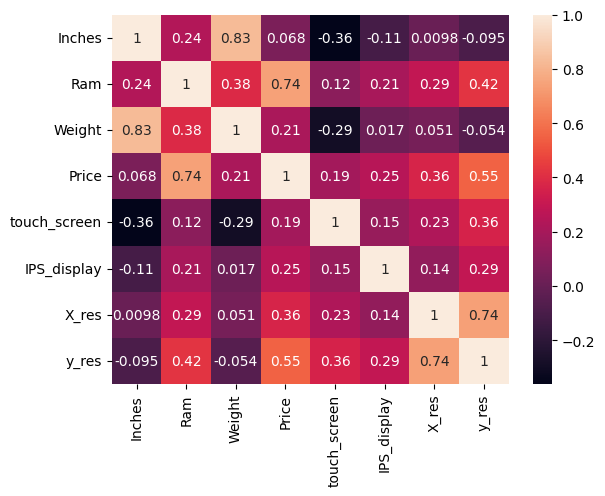

In [197]:
heat=df.corr(numeric_only=True)
sns.heatmap(heat,annot=True)

<Axes: xlabel='IPS_display', ylabel='Price'>

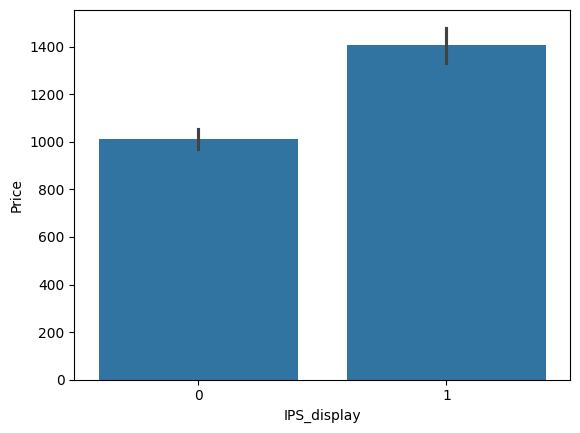

In [198]:
sns.barplot(x=df['IPS_display'],y=df['Price'])

<Axes: xlabel='X_res', ylabel='Price'>

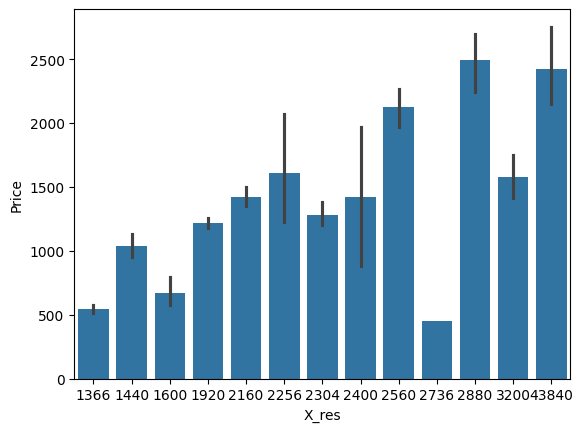

In [199]:
sns.barplot(x=df['X_res'],y=df['Price'])

<Axes: xlabel='y_res', ylabel='Price'>

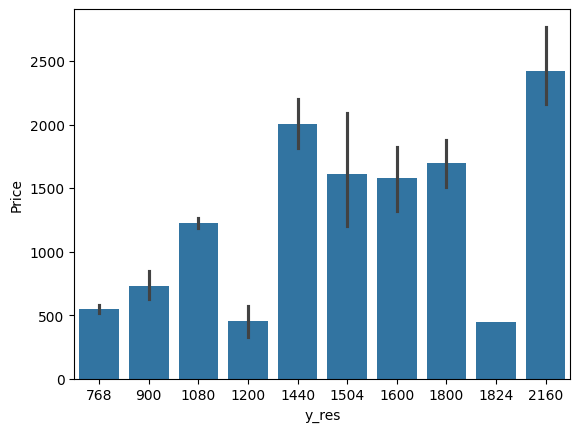

In [200]:
sns.barplot(x=df['y_res'],y=df['Price'])

Now we create PPI(Pixel Per Inch) column from X_res,y_res and Inches . The purpose of creating thePPI column is to measure the pixel density of the laptop's display, providing a metric that quantifies the number of pixels per inch

In [201]:
df['PPI']= (((df['X_res']**2) + (df['y_res']**2))**0.5/df['Inches']).astype(float)
df['PPI']= df['PPI'].round(2)

<Axes: >

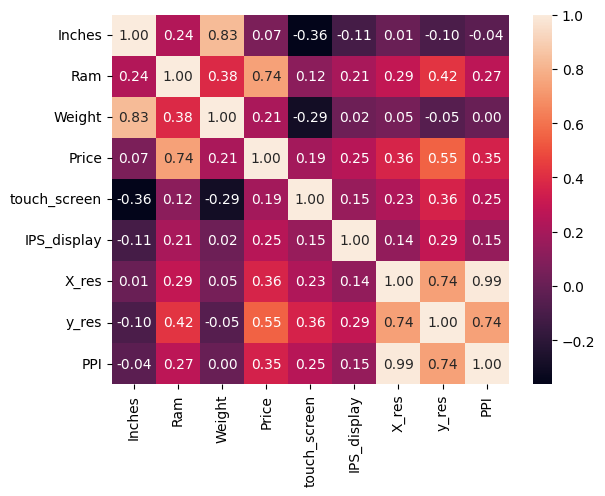

In [202]:
heat=df.corr(numeric_only=True)
sns.heatmap(heat,annot=True,fmt='.2f')

In [203]:
df.Cpu.value_counts()

Cpu
Intel Core i5 7200U 2.5GHz       190
Intel Core i7 7700HQ 2.8GHz      146
Intel Core i7 7500U 2.7GHz       134
Intel Core i7 8550U 1.8GHz        73
Intel Core i5 8250U 1.6GHz        72
                                ... 
Intel Core M M3-6Y30 0.9GHz        1
AMD A9-Series 9420 2.9GHz          1
Intel Core i3 6006U 2.2GHz         1
AMD A6-Series 7310 2GHz            1
Intel Xeon E3-1535M v6 3.1GHz      1
Name: count, Length: 118, dtype: int64

In [204]:
df['CPU_name']= df['Cpu'].apply(lambda x:"".join(x.split()[:3]))
df.head()

,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,touch_screen,IPS_display,X_res,y_res,PPI,CPU_name
0,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,1339.69,0,1,2560,1600,226.98,IntelCorei5
1,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,898.94,0,0,1440,900,127.68,IntelCorei5
2,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,575.00,0,0,1920,1080,141.21,IntelCorei5
3,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,2537.45,0,1,2880,1800,220.53,IntelCorei7
4,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,1803.60,0,1,2560,1600,226.98,IntelCorei5


In [205]:
def processor(x):
    if x=='IntelCorei5' or x== 'IntelCorei7'or x=='IntelCorei3':
        return x
    if x.split()[0]=='AMD':
        return 'AMD Processor'
    if x.split()[0]=='Intel':
        return 'Other Intel Processor'
    else:
        return 'Samsung Processor'

df['CPU']= df['CPU_name'].apply(processor)

In [206]:
df.Memory.value_counts()

Memory
256GB SSD                        412
1TB HDD                          223
500GB HDD                        132
512GB SSD                        118
128GB SSD +  1TB HDD              94
128GB SSD                         76
256GB SSD +  1TB HDD              73
32GB Flash Storage                38
2TB HDD                           16
64GB Flash Storage                15
512GB SSD +  1TB HDD              14
1TB SSD                           14
256GB SSD +  2TB HDD              10
1.0TB Hybrid                       9
256GB Flash Storage                8
16GB Flash Storage                 7
32GB SSD                           6
180GB SSD                          5
128GB Flash Storage                4
512GB SSD +  2TB HDD               3
16GB SSD                           3
512GB Flash Storage                2
1TB SSD +  1TB HDD                 2
256GB SSD +  500GB HDD             2
128GB SSD +  2TB HDD               2
256GB SSD +  256GB SSD             2
512GB SSD +  256GB SSD         

In [207]:
df['Memory'] = df['Memory'].astype(str).replace('\.0', '', regex=True)
df["Memory"] = df["Memory"].str.replace('GB', '')
df["Memory"] = df["Memory"].str.replace('TB', '000')

import re

df['Hybrid'] = df['Memory'].apply(lambda x: re.findall(r'(\d+) Hybrid', x)[0] if re.findall(r'(\d+) Hybrid', x) else 0).astype(int)
df['SSD'] = df['Memory'].apply(lambda x: re.findall(r'(\d+) SSD', x)[0] if re.findall(r'(\d+) SSD', x) else 0).astype(int)
df['HDD'] = df['Memory'].apply(lambda x: re.findall(r'(\d+) HDD', x)[0] if re.findall(r'(\d+) HDD', x) else 0).astype(int)
df['Flash_Storage'] = df['Memory'].apply(lambda x: re.findall(r'(\d+) Flash Storage', x)[0] if re.findall(r'(\d+) Flash Storage', x) else 0).astype(int)

In [208]:
df.drop(columns=['CPU_name','Memory','Cpu','ScreenResolution','X_res','y_res','Product'],inplace=True)

In [209]:
df.head()

,Company,TypeName,Inches,Ram,Gpu,OpSys,Weight,Price,touch_screen,IPS_display,PPI,CPU,Hybrid,SSD,HDD,Flash_Storage
0,Apple,Ultrabook,13.3,8,Intel Iris Plus Graphics 640,macOS,1.37,1339.69,0,1,226.98,IntelCorei5,0,128,0,0
1,Apple,Ultrabook,13.3,8,Intel HD Graphics 6000,macOS,1.34,898.94,0,0,127.68,IntelCorei5,0,0,0,128
2,HP,Notebook,15.6,8,Intel HD Graphics 620,No OS,1.86,575.00,0,0,141.21,IntelCorei5,0,256,0,0
3,Apple,Ultrabook,15.4,16,AMD Radeon Pro 455,macOS,1.83,2537.45,0,1,220.53,IntelCorei7,0,512,0,0
4,Apple,Ultrabook,13.3,8,Intel Iris Plus Graphics 650,macOS,1.37,1803.60,0,1,226.98,IntelCorei5,0,256,0,0


<Axes: >

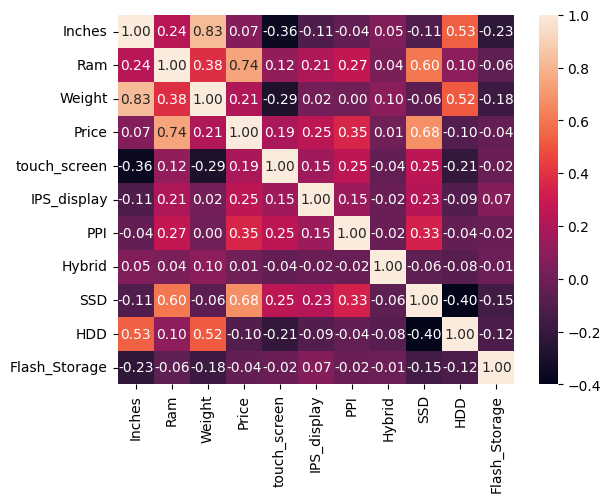

In [210]:
heat=df.corr(numeric_only=True)
sns.heatmap(heat,annot=True,fmt='.2f')

Correlation of Price with Flash_Storage and Hybrid is Negative. So remove these columns

In [211]:
df.drop(columns=['Hybrid','Flash_Storage'],inplace=True)

In [212]:
df.head()

,Company,TypeName,Inches,Ram,Gpu,OpSys,Weight,Price,touch_screen,IPS_display,PPI,CPU,SSD,HDD
0,Apple,Ultrabook,13.3,8,Intel Iris Plus Graphics 640,macOS,1.37,1339.69,0,1,226.98,IntelCorei5,128,0
1,Apple,Ultrabook,13.3,8,Intel HD Graphics 6000,macOS,1.34,898.94,0,0,127.68,IntelCorei5,0,0
2,HP,Notebook,15.6,8,Intel HD Graphics 620,No OS,1.86,575.00,0,0,141.21,IntelCorei5,256,0
3,Apple,Ultrabook,15.4,16,AMD Radeon Pro 455,macOS,1.83,2537.45,0,1,220.53,IntelCorei7,512,0
4,Apple,Ultrabook,13.3,8,Intel Iris Plus Graphics 650,macOS,1.37,1803.60,0,1,226.98,IntelCorei5,256,0


In [213]:
df.Gpu.value_counts()

Gpu
Intel HD Graphics 620      281
Intel HD Graphics 520      185
Intel UHD Graphics 620      68
Nvidia GeForce GTX 1050     66
Nvidia GeForce GTX 1060     48
                          ... 
AMD Radeon R5 520            1
AMD Radeon R7                1
Intel HD Graphics 540        1
AMD Radeon 540               1
ARM Mali T860 MP4            1
Name: count, Length: 110, dtype: int64

In [214]:
df.Gpu.unique()

array(['Intel Iris Plus Graphics 640', 'Intel HD Graphics 6000',
       'Intel HD Graphics 620', 'AMD Radeon Pro 455',
       'Intel Iris Plus Graphics 650', 'AMD Radeon R5',
       'Intel Iris Pro Graphics', 'Nvidia GeForce MX150',
       'Intel UHD Graphics 620', 'Intel HD Graphics 520',
       'AMD Radeon Pro 555', 'AMD Radeon R5 M430',
       'Intel HD Graphics 615', 'AMD Radeon Pro 560',
       'Nvidia GeForce 940MX', 'Intel HD Graphics 400',
       'Nvidia GeForce GTX 1050', 'AMD Radeon R2', 'AMD Radeon 530',
       'Nvidia GeForce 930MX', 'Intel HD Graphics',
       'Intel HD Graphics 500', 'Nvidia GeForce 930MX ',
       'Nvidia GeForce GTX 1060', 'Nvidia GeForce 150MX',
       'Intel Iris Graphics 540', 'AMD Radeon RX 580',
       'Nvidia GeForce 920MX', 'AMD Radeon R4 Graphics', 'AMD Radeon 520',
       'Nvidia GeForce GTX 1070', 'Nvidia GeForce GTX 1050 Ti',
       'Nvidia GeForce MX130', 'AMD R4 Graphics',
       'Nvidia GeForce GTX 940MX', 'AMD Radeon RX 560',
       'Nvid

In [215]:
def GPU(x):
    if x.split()[0]=='Intel':
        return 'Intel'
    if x.split()[0]=='AMD':
        return 'AMD'
    if x.split()[0]=='Nvidia':
      return "Nvidia"
    if x.split()[0]=='ARM':
      return "ARM"

In [216]:
df['GPU_brand']= df['Gpu'].apply(GPU)

In [217]:
df.drop(columns=['Gpu','Inches'],inplace=True)
df.head()

,Company,TypeName,Ram,OpSys,Weight,Price,touch_screen,IPS_display,PPI,CPU,SSD,HDD,GPU_brand
0,Apple,Ultrabook,8,macOS,1.37,1339.69,0,1,226.98,IntelCorei5,128,0,Intel
1,Apple,Ultrabook,8,macOS,1.34,898.94,0,0,127.68,IntelCorei5,0,0,Intel
2,HP,Notebook,8,No OS,1.86,575.00,0,0,141.21,IntelCorei5,256,0,Intel
3,Apple,Ultrabook,16,macOS,1.83,2537.45,0,1,220.53,IntelCorei7,512,0,AMD
4,Apple,Ultrabook,8,macOS,1.37,1803.60,0,1,226.98,IntelCorei5,256,0,Intel


In [218]:
df.GPU_brand.value_counts()

GPU_brand
Intel     722
Nvidia    400
AMD       180
ARM         1
Name: count, dtype: int64

In [219]:
df= df[df.GPU_brand!='ARM']

In [220]:
df.GPU_brand.value_counts()

GPU_brand
Intel     722
Nvidia    400
AMD       180
Name: count, dtype: int64

<Axes: xlabel='GPU_brand', ylabel='Price'>

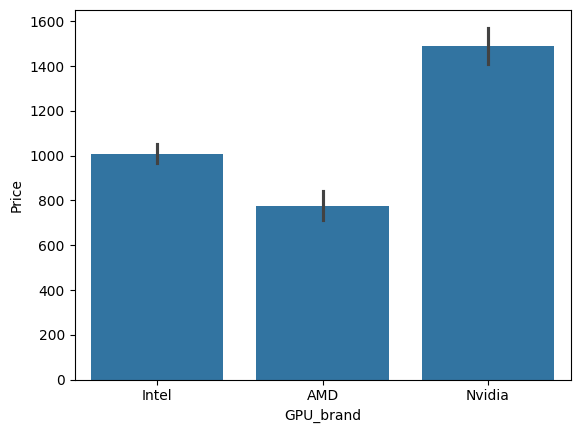

In [221]:
sns.barplot(x=df['GPU_brand'],y=df['Price'])

In [222]:
df.OpSys.value_counts()

OpSys
Windows 10      1072
No OS             66
Linux             62
Windows 7         45
Chrome OS         26
macOS             13
Mac OS X           8
Windows 10 S       8
Android            2
Name: count, dtype: int64

In [223]:
col= {'Mac OS X':'Mac','macOS':'Mac'}
df['OpSys'].replace(col,inplace=True)

In [224]:
def OS(x):
    if x.split()[0]=='Windows':
        return 'Windows'
    if x.split()[0]=='Mac':
        return 'Mac'
    if x.split()[0]=='Linux':
        return 'Linux'
    else:
        return 'Other OS'

In [225]:
df['OS']= df['OpSys'].apply(OS)

In [226]:
df.OS.value_counts()

OS
Windows     1125
Other OS      94
Linux         62
Mac           21
Name: count, dtype: int64

<Axes: xlabel='OS', ylabel='Price'>

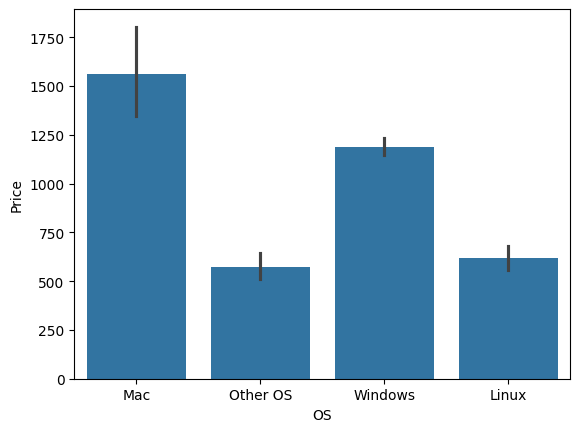

In [227]:
sns.barplot(x=df['OS'],y=df['Price'])

In [228]:
df.drop(columns=['OpSys'],inplace=True)

In [229]:
df.head()

,Company,TypeName,Ram,Weight,Price,touch_screen,IPS_display,PPI,CPU,SSD,HDD,GPU_brand,OS
0,Apple,Ultrabook,8,1.37,1339.69,0,1,226.98,IntelCorei5,128,0,Intel,Mac
1,Apple,Ultrabook,8,1.34,898.94,0,0,127.68,IntelCorei5,0,0,Intel,Mac
2,HP,Notebook,8,1.86,575.00,0,0,141.21,IntelCorei5,256,0,Intel,Other OS
3,Apple,Ultrabook,16,1.83,2537.45,0,1,220.53,IntelCorei7,512,0,AMD,Mac
4,Apple,Ultrabook,8,1.37,1803.60,0,1,226.98,IntelCorei5,256,0,Intel,Mac


<Axes: >

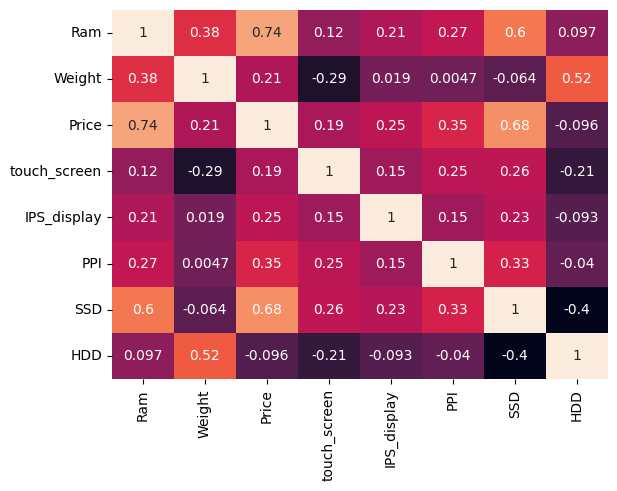

In [230]:
sns.heatmap(df.corr(numeric_only=True),annot=True,cbar=False)

In [231]:
df.skew(numeric_only=True)

Ram             2.686583
Weight          1.145635
Price           1.519750
touch_screen    1.999470
IPS_display     0.983469
PPI             5.297480
SSD             1.337075
HDD             0.878180
dtype: float64

In [233]:
X = df.drop(columns=['Price'])
y = np.log(df['Price'])

In [235]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,y, test_size=0.25,random_state=42)

In [237]:
df.Company.value_counts()

Company
Dell         297
Lenovo       297
HP           274
Asus         158
Acer         103
MSI           54
Toshiba       48
Apple         21
Samsung        8
Razer          7
Mediacom       7
Microsoft      6
Xiaomi         4
Vero           4
Chuwi          3
Google         3
Fujitsu        3
LG             3
Huawei         2
Name: count, dtype: int64

In [238]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import r2_score,mean_absolute_error
from sklearn.ensemble import RandomForestRegressor

In [240]:
X.dtypes

Company          object
TypeName         object
Ram               int64
Weight          float64
touch_screen      int64
IPS_display       int64
PPI             float64
CPU              object
SSD               int64
HDD               int64
GPU_brand        object
OS               object
dtype: object

In [241]:
from sklearn.model_selection import RandomizedSearchCV

In [252]:
import random
from scipy.stats import randint
step1 = ColumnTransformer(transformers=[
    ('col_tnf', OneHotEncoder(sparse=False, drop='first'), [0, 1, 7, 10, 11])
], remainder='passthrough')

step2 = RandomForestRegressor(random_state=3)

pipe = Pipeline([
    ('step1', step1),
    ('step2', step2)
])

# Parameter grid for random search
# Example of an expanded parameter grid
param_distributions = {
    'step2__n_estimators': randint(50, 300),  # Increased upper bound
    'step2__max_samples': [0.3, 0.5, 0.75, 1.0],  # Expanded range
    'step2__max_features': [0.3, 0.5, 0.75, 1.0],  # Expanded range
    'step2__max_depth': randint(3, 20),  # Wider range
    'step2__min_samples_split': randint(2, 10),  # Added hyperparameter
    'step2__min_samples_leaf': randint(1, 5),    # Added hyperparameter
    'step2__bootstrap': [True, False]             # Added hyperparameter
}

# Example of increasing n_iter
random_search = RandomizedSearchCV(pipe, param_distributions, n_iter=50, cv=5, random_state=42, n_jobs=-1)

# Fit the RandomizedSearchCV to the training data
random_search.fit(x_train, y_train)

# Make predictions on the test set
y_pred = random_search.predict(x_test)

# Output the best parameters and evaluation metrics
print('Best parameters found: ', random_search.best_params_)
# Make predictions on the training set
y_train_pred = random_search.predict(x_train)

# Calculate evaluation metrics for the training set
print('Training Set R2 score:', r2_score(y_train, y_train_pred))
print('Training Set MAE:', mean_absolute_error(y_train, y_train_pred))

# Compare with the test set metrics
print('Test Set R2 score:', r2_score(y_test, y_pred))
print('Test Set MAE:', mean_absolute_error(y_test, y_pred))

Best parameters found:  {'step2__bootstrap': True, 'step2__max_depth': 17, 'step2__max_features': 0.75, 'step2__max_samples': 1.0, 'step2__min_samples_leaf': 1, 'step2__min_samples_split': 6, 'step2__n_estimators': 152}
Training Set R2 score: 0.9612411797694146
Training Set MAE: 0.09336150570526949
Test Set R2 score: 0.8731671200425916
Test Set MAE: 0.17068380274757536
